# Lab 1a

## Fix data

In [2]:
import numpy as np

n = 100
mA = [1.0, 0.3]
mB = [-4.0, 0.0]
sigmaA = 0.8
sigmaB = 0.5

classA = np.random.randn(n, 2) * sigmaA + mA
classB = np.random.randn(n, 2) * sigmaB + mB

classA = classA.transpose()
classB = classB.transpose()

In [3]:
print(classA.shape)

(2, 100)


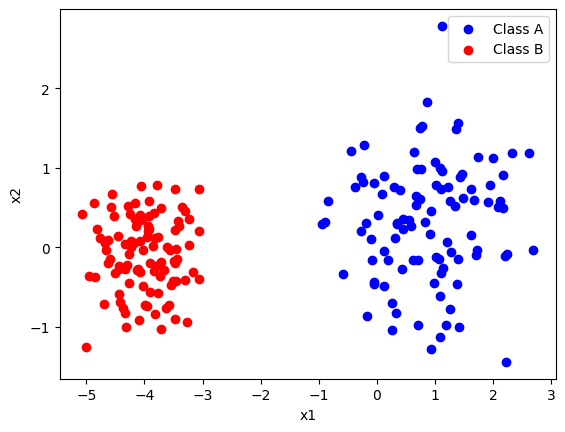

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(classA[0, :], classA[1, :], color="blue", label="Class A")
plt.scatter(classB[0, :], classB[1, :], color="red", label="Class B")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [5]:
# Create input data, with bias term (one extra dimension)
classABias = np.concatenate((classA, np.ones((1, n))), axis=0)
classBBias = np.concatenate((classB, np.ones((1, n))), axis=0)

# This is our input data (2 classes, with 2 dimensions for visualizatio in 2D plane + 1 deminsion for the bias term)
patterns = np.concatenate((classABias, classBBias), axis=1)

# Create shuffled indices. Will be used to shuffle the samples
shuffled_indices = np.random.permutation(patterns.shape[1])

# Shuffle Input data
patterns_shuffled = patterns[:, shuffled_indices]

# Target data (delta rule)
targetsDelta = np.concatenate((np.ones(classA.shape[1]), -np.ones(classB.shape[1])))
targetsDelta_shuffled = targetsDelta[shuffled_indices] # Shuffle targets

# Target data (perceptron rule)
targetsPerc = np.concatenate((np.ones(classA.shape[1]), np.zeros(classB.shape[1])))
targetsPerc_shuffled = targetsPerc[shuffled_indices] # Shuffle targets

In [6]:
def plot_classifier(ClassA, ClassB, w):
    slope = -w[0, 0]/w[0, 1]  #The slope of the boundary
    constant_term = -w[0, 2]/w[0, 1] #The constant term of the linear equation 

    boundary_x = np.linspace(-2, 1, num=100, endpoint=True, retstep=False, dtype=None, axis=0, device=None)
    boundary_y = slope * boundary_x + constant_term


    plt.scatter(ClassA[0, :], ClassA[1, :], color="blue", label="Class A")
    plt.scatter(ClassB[0, :], ClassB[1, :], color="red", label="Class B")
    plt.plot(boundary_x, boundary_y, color="black", label="Boundary")
    plt.ylim(classA[1, :].min(), classA[1, :].max())
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.show()

In [7]:
print(patterns_shuffled.shape)

(3, 200)


In [9]:
def treshold(y_pred):
    if y_pred > 0:
        return 1
    else:
        return 0

# Perceptron rule
def perceptron_rule(x, y, create_plot: bool = False):
    eta = 0.01
    # w = np.random.rand(1,3) # use this to insert randomness (will show how it iterates through until it finds a solution). Use this for presentation
    w = np.zeros((1,3))

    n = x.shape[1]
    convergence = False
    counter = 0

    while convergence != True:
        convergence = True

        for i in range(n):
            y_pred = np.dot(w, x[:, i])

            t_target = treshold(y_pred)

            if t_target == y[i]:
                continue
            elif t_target == 0 and y[i] == 1:
                w_delta = x[:, i] * eta
                convergence = False
            else:
                w_delta = x[:, i] * -eta
                convergence = False

            # Update weights
            w = w + np.transpose(w_delta)

            if not convergence and create_plot:
                plot_classifier(ClassA=classA, ClassB=classB, w=w)
            counter += 1
    return w, counter

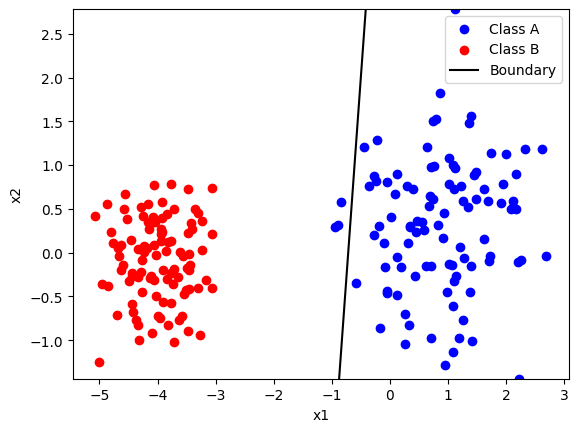

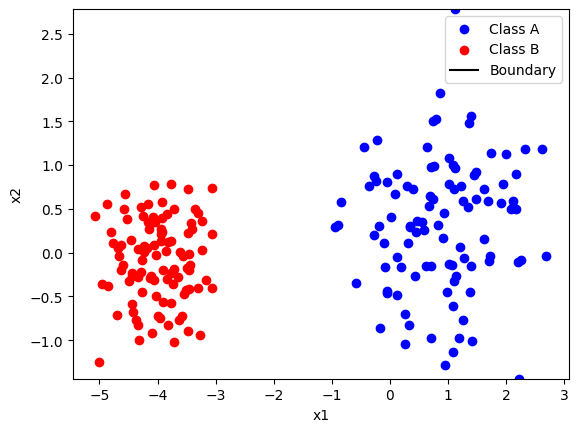

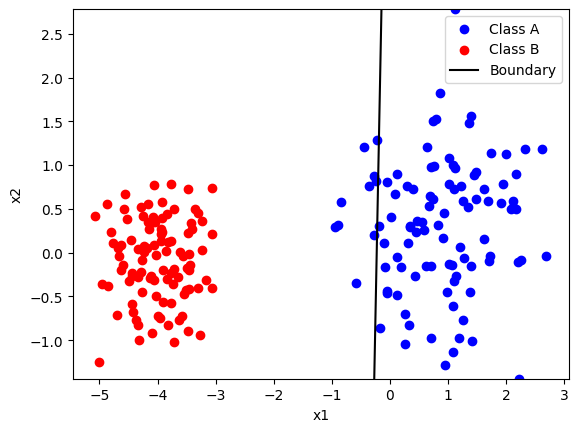

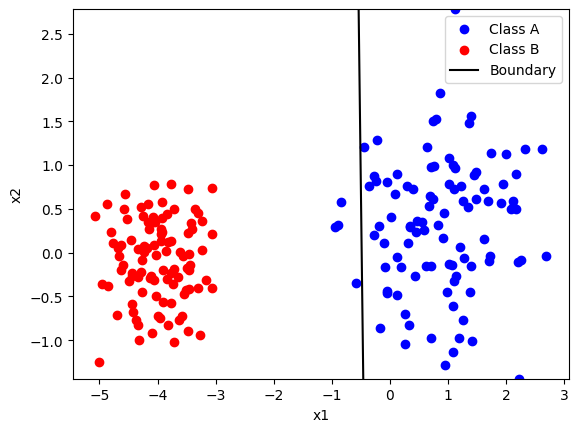

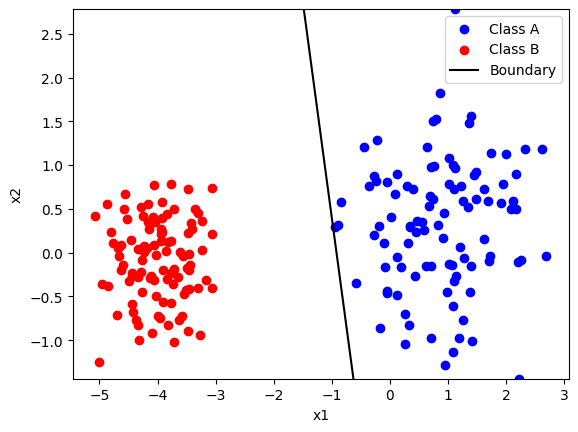

(array([[0.03258711, 0.00659301, 0.03      ]]), 5)


In [10]:
results = perceptron_rule(x=patterns_shuffled, y=targetsPerc_shuffled, create_plot = True)
print(results)

## Delta Rule

In [11]:
def delta_rule_batch(epoch, x, y, eta: int = 0.001, create_plot: bool = False):

    # Weights should be initialized with small random numbers from normal distribution with zero mean
    w = np.random.normal(loc=0.0, scale=1.0, size=(1,3))

    for e in range(epoch):
        w_delta= -eta * (w @ x - y) @ np.transpose(x)

        w = w + w_delta
        if create_plot: 
            plot_classifier(ClassA= classA, ClassB=classB, w=w)


    return w

In [12]:
def delta_rule_online(epoch, x, y, eta: int = 0.001, create_plot: bool = False):

    # Weights should be initialized with small random numbers from normal distribution with zero mean
    w = np.random.normal(loc=0.0, scale=1.0, size=(1,3))
    epoch_reached = False
    epoch_count = 0


    while not epoch_reached: 

        for i in range(len(x[0])):

            w_delta = -eta*x[:,i] * (w @ x[:,i] - y[i])
            w = w + w_delta

            if create_plot: 
                plot_classifier(ClassA=classA, ClassB=classB, w=w)

        epoch_count +=1

        if epoch_count == epoch: 
            epoch_reached = True

        return w

In [13]:
w_delta_online=delta_rule_online(epoch=2000,x=patterns_shuffled, y=targetsDelta_shuffled, create_plot= False)
w_perceptron, _=perceptron_rule(x=patterns_shuffled, y=targetsPerc_shuffled, create_plot = False)
w_delta_batch= delta_rule_batch(epoch=2000,x=patterns_shuffled, y=targetsDelta_shuffled, create_plot = False)

In [14]:
print(w_delta_batch,w_delta_online,w_perceptron)

[[0.38089376 0.01236327 0.59413781]] [[0.82849385 0.03174067 1.2428169 ]] [[0.03258711 0.00659301 0.03      ]]


In [15]:

def calculate_boundary(w):
   
   slope = -w[0, 0]/w[0, 1]  #The slope of the boundary
   constant_term = -w[0, 2]/w[0, 1] #The constant term of the linear equation 

   boundary_x = np.linspace(patterns_shuffled.min(), patterns_shuffled.max(), num=100, endpoint=True, retstep=False, dtype=None, axis=0, device=None)
   boundary_y = slope * boundary_x + constant_term

   return boundary_x, boundary_y


In [16]:
delta_bound_online = calculate_boundary(w_delta_online)
perceptron_bound= calculate_boundary(w_perceptron)
delta_bound_batch=calculate_boundary(w_delta_batch)

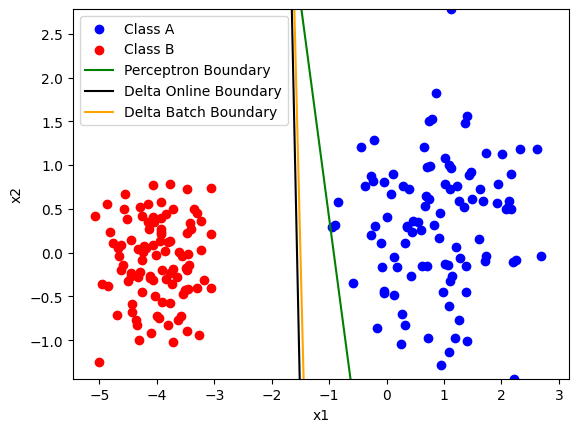

In [17]:
plt.scatter(classA[0, :], classA[1, :], color="blue", label="Class A")
plt.scatter(classB[0, :], classB[1, :], color="red", label="Class B")
plt.plot(perceptron_bound[0],perceptron_bound[1], color="green", label="Perceptron Boundary")
plt.plot(delta_bound_batch[0],delta_bound_batch[1], color="black", label="Delta Online Boundary")
plt.plot(delta_bound_online[0],delta_bound_online[1], color="orange", label="Delta Batch Boundary")
plt.ylim(classA[1, :].min(), classA[1, :].max())
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()